# Read and write SHP files

We'll do this in two ways: via `geopandas`, and directly via `fiona`. 

We'll do it with some well data.

In [1]:
import numpy as np
import fiona
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
import fiona
with fiona.open('../data/offshore_wells_2011_Geographic_NAD27.shp') as src:
    meta = src.meta
    print(dir(src))

['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bounds', '_crs', '_crs_wkt', '_driver', '_len', '_schema', 'bounds', 'close', 'closed', 'crs', 'crs_wkt', 'driver', 'enabled_drivers', 'encoding', 'env', 'filter', 'flush', 'guard_driver_mode', 'items', 'iterator', 'keys', 'meta', 'mode', 'name', 'next', 'path', 'profile', 'schema', 'session', 'validate_record', 'validate_record_geometry', 'values', 'write', 'writerecords']


In [3]:
meta

{'crs': {'init': 'epsg:4267'},
 'crs_wkt': 'GEOGCS["GCS_North_American_1927",DATUM["North_American_Datum_1927",SPHEROID["Clarke_1866",6378206.4,294.9786982]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4267"]]',
 'driver': 'ESRI Shapefile',
 'schema': {'geometry': 'Point',
  'properties': OrderedDict([('Well_No_', 'float:16.6'),
               ('D__', 'float:16.6'),
               ('Well_Name', 'str:254'),
               ('Well_Nam_1', 'str:254'),
               ('Company', 'str:254'),
               ('Drilling_U', 'str:254'),
               ('Spud_Date', 'date'),
               ('Well_Termi', 'date'),
               ('RT_Elevati', 'float:16.6'),
               ('Water_Dept', 'float:16.6'),
               ('Total_Dept', 'float:16.6'),
               ('Total_De_1', 'float:16.6'),
               ('Well_Type', 'str:254'),
               ('Well_Symb', 'str:30')])}}

In [4]:
import pprint
with fiona.open('../data/offshore_wells_2011_Geographic_NAD27.shp') as src:
    pprint.pprint(src[0])

{'geometry': {'coordinates': (-59.9170497222, 43.9346961111), 'type': 'Point'},
 'id': '0',
 'properties': OrderedDict([('Well_No_', 1.0),
                            ('D__', 1.0),
                            ('Well_Name', 'Sable Island'),
                            ('Well_Nam_1', 'C-67'),
                            ('Company', 'Mobil et al'),
                            ('Drilling_U', 'Bawden Rig 18'),
                            ('Spud_Date', '1967-06-07'),
                            ('Well_Termi', '1968-01-02'),
                            ('RT_Elevati', 8.2),
                            ('Water_Dept', 3.9),
                            ('Total_Dept', 4604.0),
                            ('Total_De_1', 15106.0),
                            ('Well_Type', 'Exploratory'),
                            ('Well_Symb', 'Plugged dry hole')]),
 'type': 'Feature'}


## Using Geopandas

In [5]:
import geopandas as gpd

A quick 'Hello world!' in GeoPandas.

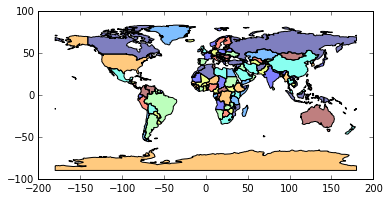

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

Now our data.

In [7]:
gdf = gpd.read_file('../data/offshore_wells_2011_Geographic_NAD27.shp')

In [8]:
gdf

,Company,D__,Drilling_U,RT_Elevati,Spud_Date,Total_De_1,Total_Dept,Water_Dept,Well_Nam_1,Well_Name,Well_No_,Well_Symb,Well_Termi,Well_Type,geometry
0,Mobil et al,1.0,Bawden Rig 18,8.20,1967-06-07,15106.00,4604.0,3.9,C-67,Sable Island,1.0,Plugged dry hole,1968-01-02,Exploratory,POINT (-59.9170497222 43.9346961111)
1,Shell,2.0,Sedneth 1,25.90,1969-09-01,13085.00,3988.0,57.9,E-84,Onondaga,2.0,Plugged gas well,1969-11-11,Exploratory,POINT (-60.2214388889 43.721147222222)
2,Shell,3.0,Sedneth 1,25.90,1969-11-16,13516.00,4120.0,82.3,O-25,Oneida,3.0,Plugged dry hole,1970-02-10,Exploratory,POINT (-61.5601366667 43.2492655556)
3,Shell,4.0,Sedneth 1,26.00,1970-02-16,7235.00,2205.0,95.1,N-30,Naskapi,4.0,Plugged dry hole,1970-03-19,Exploratory,POINT (-62.5665408333 43.4963302778)
4,Shell,5.0,Sedco H,31.40,1970-05-03,6975.00,2126.0,117.0,B-93,Mohawk,5.0,Plugged dry hole,1970-05-23,Exploratory,POINT (-64.7315288889 42.7029227778)
5,Shell,6.0,Sedco H,31.40,1970-09-08,13070.00,3984.0,53.3,E-35,Cree,6.0,Plugged gas show,1970-11-03,Exploratory,POINT (-60.5988538889 43.7391086111)
6,Shell,7.0,Sedneth 1,26.00,1970-03-25,12750.00,3886.0,62.8,J-77,Mic Mac,7.0,Plugged oil show,1970-05-24,Exploratory,POINT (-59.4363513889 44.6118933333)
7,Shell,8.0,Sedneth 1,25.90,1970-08-31,15700.00,4785.0,54.3,H-86,Mic Mac,8.0,Plugged dry hole,1970-12-02,Exploratory,POINT (-59.4508686111 44.5910494444)
8,Shell,9.0,Sedneth 1,25.90,1970-05-26,13787.00,4202.0,102.1,H-54,Missisauga,9.0,Plugged dry hole,1970-07-20,Exploratory,POINT (-59.37988 44.3889988889)
9,Shell,10.0,Sedneth 1,25.90,1970-12-04,14991.00,4569.0,106.7,J-56,Abenaki,10.0,Plugged dry hole,1971-03-13,Exploratory,POINT (-59.88417222222222 44.2623866667)


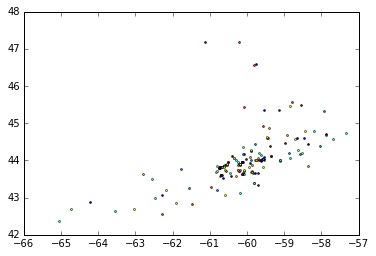

In [9]:
gdf.plot()

In [10]:
gdf.geometry[:5]

0      POINT (-59.9170497222 43.9346961111)
1    POINT (-60.2214388889 43.721147222222)
2      POINT (-61.5601366667 43.2492655556)
3      POINT (-62.5665408333 43.4963302778)
4      POINT (-64.7315288889 42.7029227778)
Name: geometry, dtype: object

Notice we're in lat, lon:

In [11]:
gdf.crs

{'init': 'epsg:4267'}

[EPSG 4267](http://spatialreference.org/ref/epsg/4267/)

## Write a new file

Let's cast the SHP to a new CRS: [EPSG 26920](http://spatialreference.org/ref/epsg/26920/) and add a new attribute with the two-way seismic travel time to the seafloor.

In [12]:
gdf = gdf.to_crs({'init': 'epsg:26920'})

In [13]:
gdf.geometry[:5]

0    POINT (747510.4372073817 4869250.818941216)
1    POINT (723875.2971043108 4844664.069700129)
2     POINT (616945.850614059 4789511.343230168)
3    POINT (535101.4182156855 4816032.927423127)
4    POINT (358242.7522037996 4729291.710525603)
Name: geometry, dtype: object

In [14]:
gdf['seafl_twt'] = 1000 * 2 * gdf.Water_Dept / 1485

In [15]:
gdf.describe()

,D__,RT_Elevati,Total_De_1,Total_Dept,Water_Dept,Well_No_,seafl_twt
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,237.246377,34.719952,13026.159662,3969.690821,142.545894,104.043478,191.981002
std,127.765494,11.185937,4081.887038,1262.667988,350.268990,59.936723,471.742748
min,0.000000,6.400000,1503.000000,0.000000,0.000000,1.000000,0.000000
25%,129.500000,25.900000,9984.000000,3043.000000,39.500000,52.500000,53.198653
50%,267.000000,31.400000,13202.000000,4024.000000,53.300000,104.000000,71.784512
75%,349.500000,41.500000,15683.000000,4800.500000,82.650000,156.500000,111.313131
max,403.000000,82.000000,21404.000000,6676.000000,2091.500000,207.000000,2816.835017


In [16]:
gdf.to_file('../data/offshore_wells_2011_UTM20_NAD83.shp')

In [17]:
ls ../data/*.shp

../data/offshore_wells_2011_Geographic_NAD27.shp*
../data/offshore_wells_2011_UTM20_NAD83.shp


## Extra: Maps with folium

In [18]:
import folium

# Must be geographic coords, so casting to WGS84.
gdf = gdf.to_crs({'init': 'epsg:4326'})

# Make the map, add the features via GeoJSON.
mymap = folium.Map(location=[45, -62], zoom_start=7)
features = folium.features.GeoJson(gdf.to_json())
mymap.add_children(features)

mymap

## Extra: GeoJSON

In [19]:
with open('../data/offshore_wells.geojson', 'w') as f:
    f.write(gdf.to_json())

It's pretty cool how GeoJSON files show up [in GitHub](https://github.com/agile-geoscience/geocomputing/blob/master/data/offshore_wells.geojson)... 

[https://github.com/agile-geoscience/geocomputing/blob/master/data/offshore_wells.geojson](https://github.com/agile-geoscience/geocomputing/blob/master/data/offshore_wells.geojson)

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>